In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data=boston.data
label=boston.target
columns=boston.feature_names

In [6]:
data=pd.DataFrame(data,columns=columns)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=1)

In [8]:
X_train["RM"].values.reshape(-1,1)[:5]

array([[6.169],
       [6.145],
       [5.277],
       [6.232],
       [5.565]])

In [9]:
sim_lr=LinearRegression()

In [10]:
sim_lr.fit(X_train["RM"].values.reshape(-1,1),y_train)

LinearRegression()

In [11]:
y_pred=sim_lr.predict(X_test["RM"].values.reshape(-1,1))

In [12]:
from sklearn.metrics import r2_score
print('단순 선형 회귀 , R2:{:.4f}'.format(r2_score(y_test,y_pred)))

단순 선형 회귀 , R2:0.5877


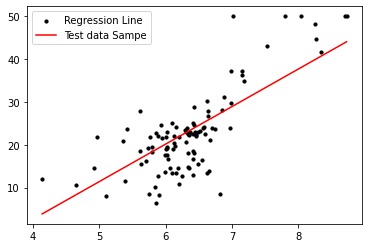

In [13]:
line_x=np.linspace(np.min(X_test["RM"]),np.max(X_test["RM"]),10)
line_y=sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test["RM"],y_test,s=10,c="black")
plt.plot(line_x,line_y,c="red")
plt.legend(["Regression Line","Test data Sampe"],loc="upper left")

In [14]:
mul_lr=LinearRegression()
mul_lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=mul_lr.predict(X_test)

In [16]:
print('다중 선형 회귀:{:.4f}'.format(r2_score(y_test,y_pred)))

다중 선형 회귀:0.7634


In [17]:
from sklearn.tree import DecisionTreeRegressor
dt_regr=DecisionTreeRegressor(max_depth=5)

In [18]:
dt_regr.fit(X_train["RM"].values.reshape(-1,1),y_train)

DecisionTreeRegressor(max_depth=5)

In [19]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [20]:
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.4898


In [21]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [22]:
best_depth=0
best_r2=0
for depth in arr:
    
    dt_regr = DecisionTreeRegressor(max_depth=depth)
    dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
    y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))
    temp_r2=r2_score(y_test,y_pred)
    #print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, temp_r2))
    if best_r2<temp_r2:
        best_depth=depth
        best_r2=temp_r2
        
print("최적 결과: depth={} r2={:.4f}".format(best_depth,best_r2))
    


최적 결과: depth=2 r2=0.6636


In [23]:
dt_regr=DecisionTreeRegressor(max_depth=5)
dt_regr.fit(X_train,y_train)

y_pred=dt_regr.predict(X_test)
print('다중 결정트리 R2:{:.4f}'.format(r2_score(y_test,y_pred)))

다중 결정트리 R2:0.8588


In [24]:
#svr
from sklearn.svm import SVR
svm_regr=SVR()
svm_regr.fit(X_train["RM"].values.reshape(-1,1),y_train)

SVR()

In [25]:
y_pred=svm_regr.predict(X_test["RM"].values.reshape(-1,1))

In [26]:
print('단순 서포트 벡터 머신 회귀 R2:{:.4f}'.format(r2_score(y_test,y_pred)))

단순 서포트 벡터 머신 회귀 R2:0.5314


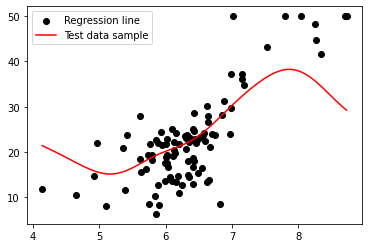

In [27]:
line_x=np.linspace(np.min(X_test["RM"]),np.max(X_test["RM"]),100)
line_y=svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test["RM"],y_test,c="black")
plt.plot(line_x,line_y,c="red")
plt.legend(["Regression line","Test data sample"],loc="upper left")

In [28]:
svm_regr=SVR(C=20)
svm_regr.fit(X_train,y_train)
y_pred=svm_regr.predict(X_test)
print("다중SVM,R2:{:4f}".format(r2_score(y_test,y_pred)))

다중SVM,R2:0.258885


In [33]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(solver='adam')

mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)

print("다중 퍼셉트론 회귀, R2:{:.4f}".format(r2_score(y_test,y_pred)))

다중 퍼셉트론 회귀, R2:0.5139
